# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* строить простую предсказательную модель


* (бонус) конструировать новые признаки

Основы matplotlib: https://devpractice.ru/matplotlib-lesson-1-quick-start-guide/

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [ ]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [ ]:
Data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [ ]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [ ]:
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [ ]:
Data = Data[Data['Sex'] != 'unknown']
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [ ]:
Data['Sex'] = Data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

Посмотрим, как влияет пол на выживаемость.

In [ ]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S


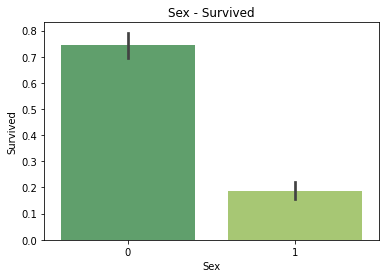

In [ ]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

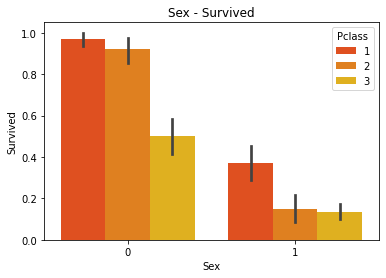

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


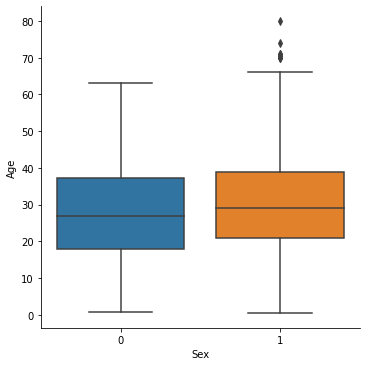

In [ ]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


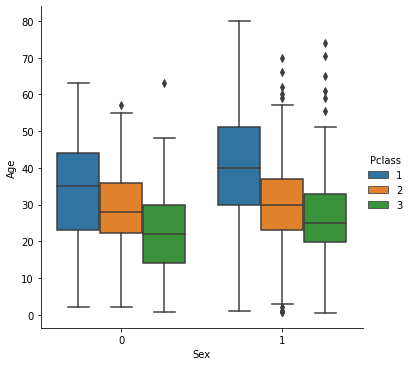

In [ ]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [ ]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [ ]:
Data.dropna(subset=['Embarked'], inplace=True)

**Задание 7.** Удалите из таблицы Data столбец Embarked.

In [ ]:
Data.drop('Embarked', axis=1, inplace=True)

In [ ]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [ ]:
Data['Age'].isnull().any()

True

Заполним пропуски медианным значением Age.

In [ ]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


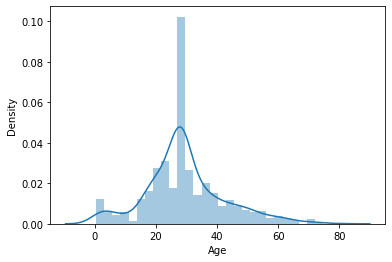

In [ ]:
sns.distplot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


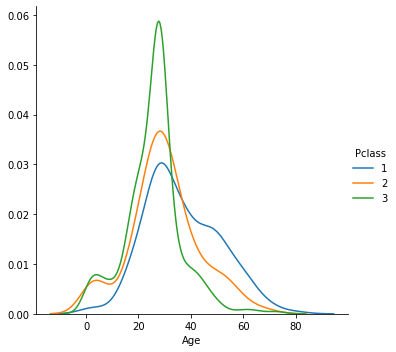

In [ ]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверим, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполним их медианным значением Fare

In [ ]:
Data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.3000      1
13.7917     1
14.1083     1
9.8375      1
17.4000     1
Name: Fare, Length: 246, dtype: int64

**Обработаем признак 'Pclass'**

In [ ]:
Data['Pclass'].value_counts()

3    487
1    214
2    183
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

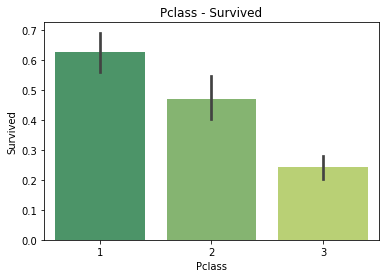

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=Data, palette='summer')
plt.title('Pclass - Survived')
plt.show()

Столбец PassengerId является категориальным и не несёт важной информации, удалим его.

In [ ]:
Data.drop('PassengerId',axis=1,inplace=True)

In [ ]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

Создадим таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [ ]:
NumericData = Data._get_numeric_data()
NumericData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


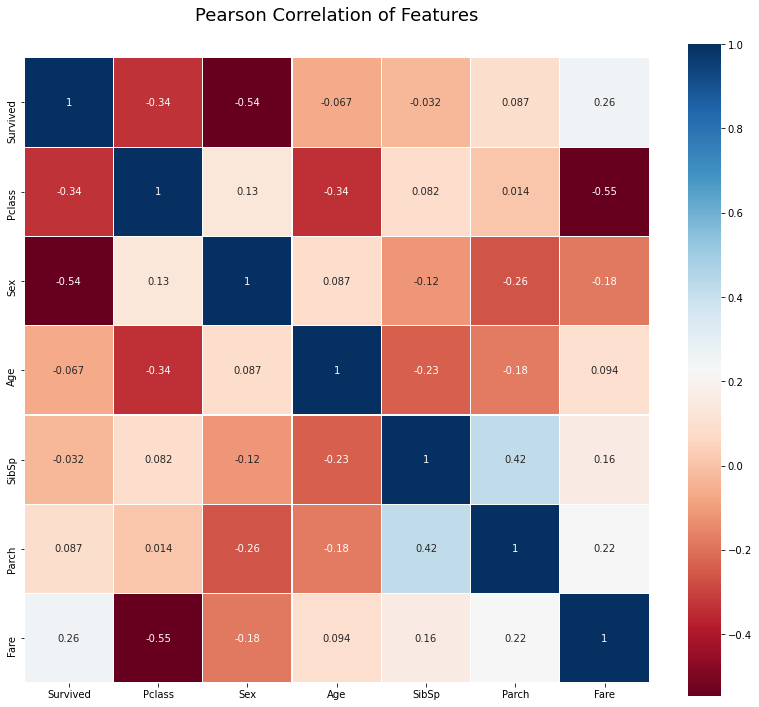

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


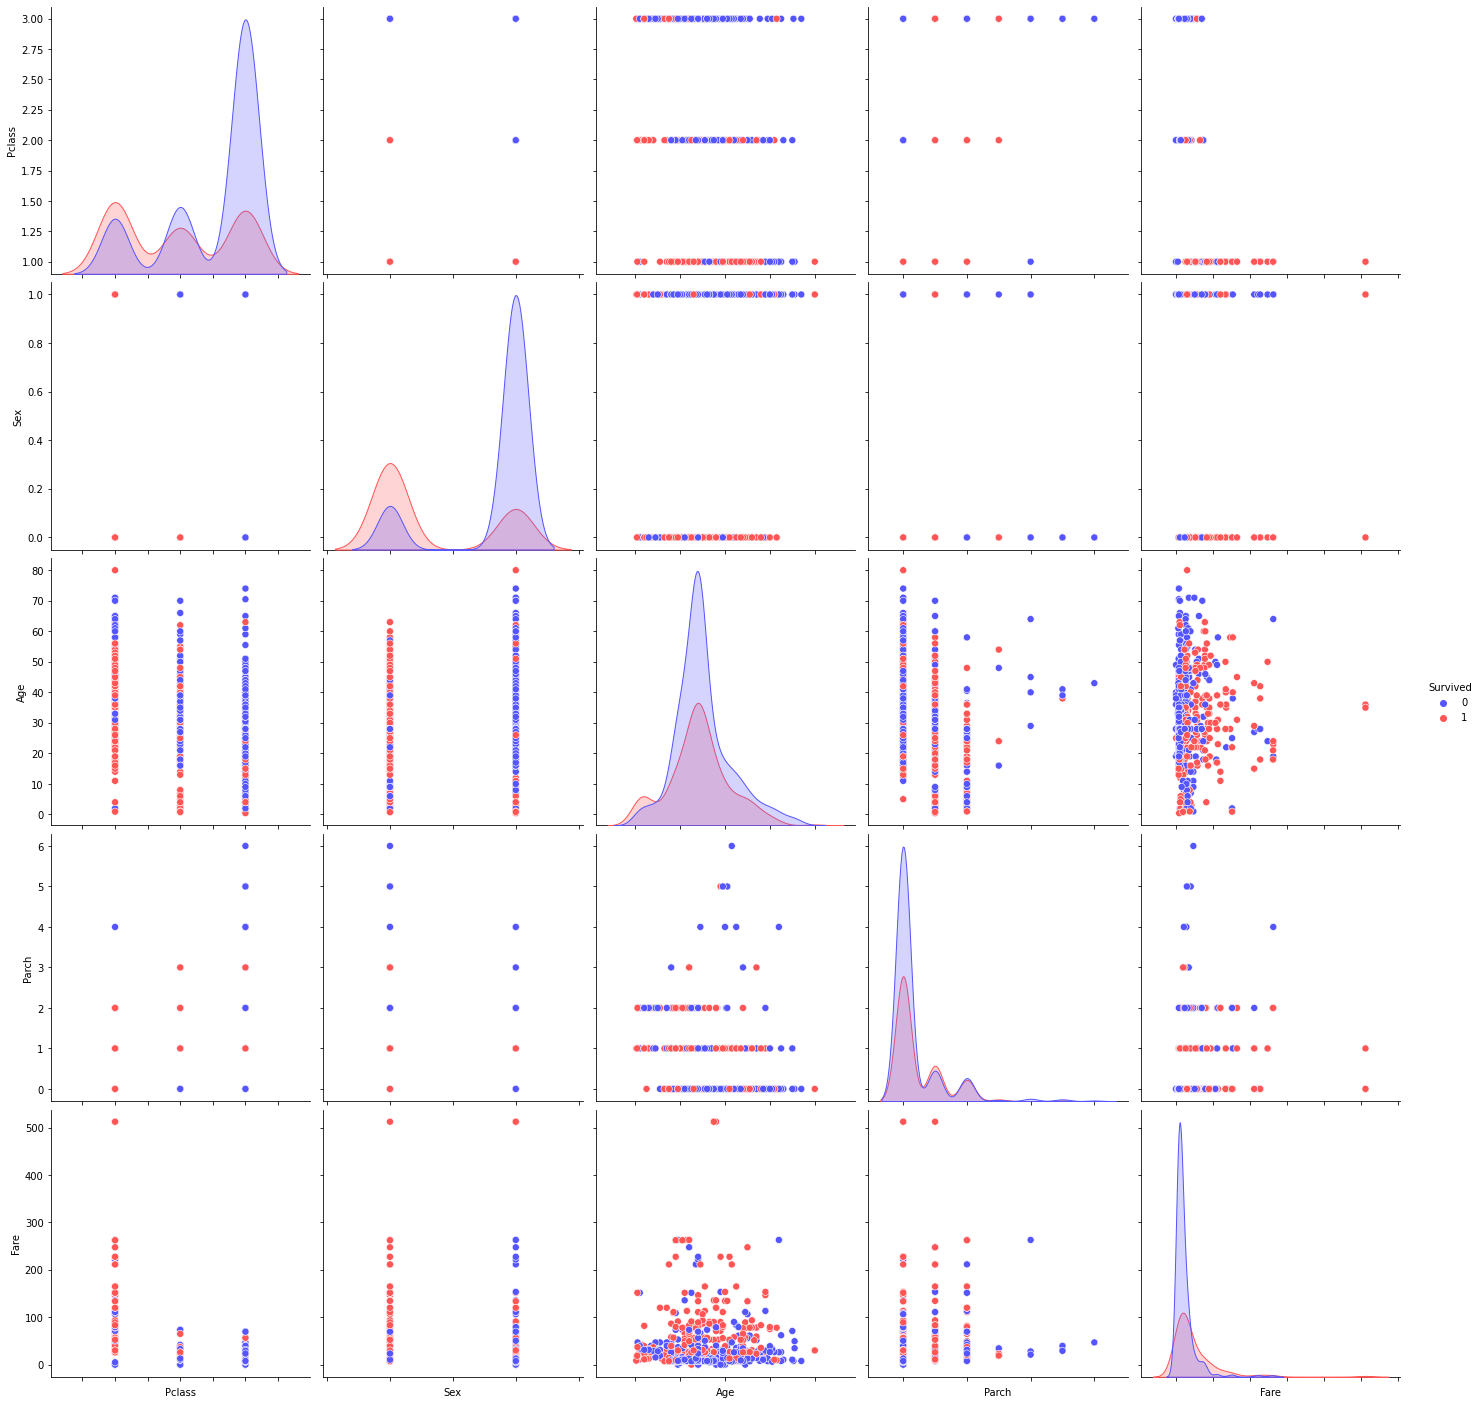

In [ ]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

### Получение простого предсказания.

Мы видим, что больше всего влияют на выживаемость пол и класс:
* женщины, как правило, выживали
* мужчины, да ещё небогатые - нет
* больше погибших, чем выживших

In [ ]:
def first_prediction(x):
    if x.Sex == 0:
        return 1
    if x.Sex == 1 and x.Pclass > 1:
        return 0
    return 0

In [ ]:
Data['prediction'] = Data.apply(lambda x: first_prediction(x), axis=1)
Data[['Survived','prediction']]

,Survived,prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


Посмотрим на качество нашего предсказания.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Data['Survived'], Data['prediction'])

0.7873303167420814

## Бонусная часть - домашнее задание (+1 балл к итоговой оценке).

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [ ]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] <
                                    (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder. Полученные метки уже можно использовать как числовые признаки.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 9.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [ ]:
Data['FareBin'] = pd.qcut(Data['Fare'].astype(int), 4)

Data['FareBin'].head()

0    (-0.001, 7.0]
1    (31.0, 512.0]
2    (-0.001, 7.0]
3    (31.0, 512.0]
4      (7.0, 14.0]
Name: FareBin, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.0] < (7.0, 14.0] < (14.0, 31.0] < (31.0, 512.0]]

In [ ]:
Data['FareBin_Code'] = label.fit_transform(Data['FareBin'])

Data[['Fare','FareBin','FareBin_Code']].head()

,Fare,FareBin,FareBin_Code
0,7.2500,"(-0.001, 7.0]",0
1,71.2833,"(31.0, 512.0]",3
2,7.9250,"(-0.001, 7.0]",0
3,53.1000,"(31.0, 512.0]",3
4,8.0500,"(7.0, 14.0]",1


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 10.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [ ]:
Data['NameLen'] = Data['Name'].apply(lambda x: len(x))
Data['FamilySize'] = Data[['Parch', 'SibSp']].apply(lambda x: x['Parch'] + x['SibSp'] + 1, axis=1)
Data['IsAlone'] = Data['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,prediction,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]",1,"(-0.001, 7.0]",0,23,2,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]",2,"(31.0, 512.0]",3,51,2,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"(16.0, 32.0]",1,"(-0.001, 7.0]",0,22,1,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,1,"(32.0, 48.0]",2,"(31.0, 512.0]",3,44,2,0
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]",2,"(7.0, 14.0]",1,24,1,1


**Задание 11**. Выведите на экран визуализации, отражающие влияние новых созданных признаков на целевую переменную (Survived). Тип визуализации остается на ваше усмотрение.

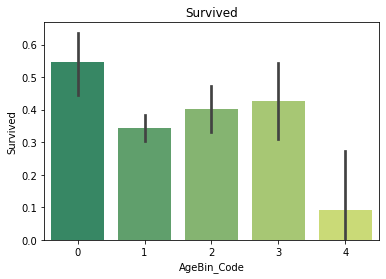

In [ ]:
sns.barplot(x='AgeBin_Code', y='Survived', data=Data, palette='summer')
plt.title('Survived')
plt.show()

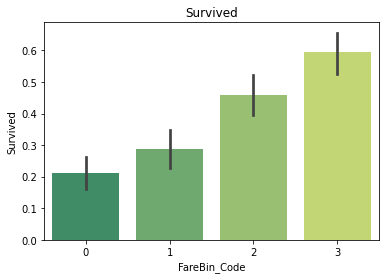

In [ ]:
sns.barplot(x='FareBin_Code', y='Survived', data=Data, palette='summer')
plt.title('Survived')
plt.show()

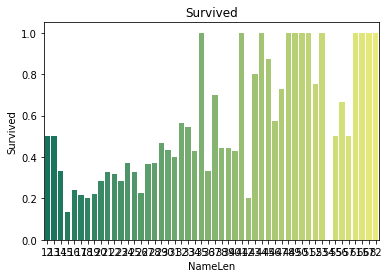

In [ ]:
sns.barplot(x='NameLen', y='Survived', data=Data, palette='summer', n_boot=1)
plt.title('Survived')
plt.show()

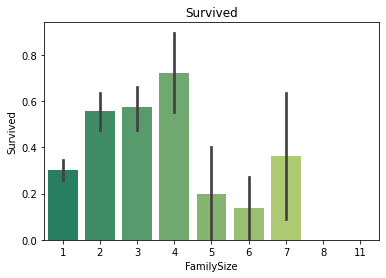

In [ ]:
sns.barplot(x='FamilySize', y='Survived', data=Data, palette='summer')
plt.title('Survived')
plt.show()

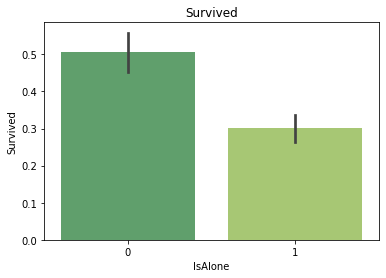

In [ ]:
sns.barplot(x='IsAlone', y='Survived', data=Data, palette='summer')
plt.title('Survived')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


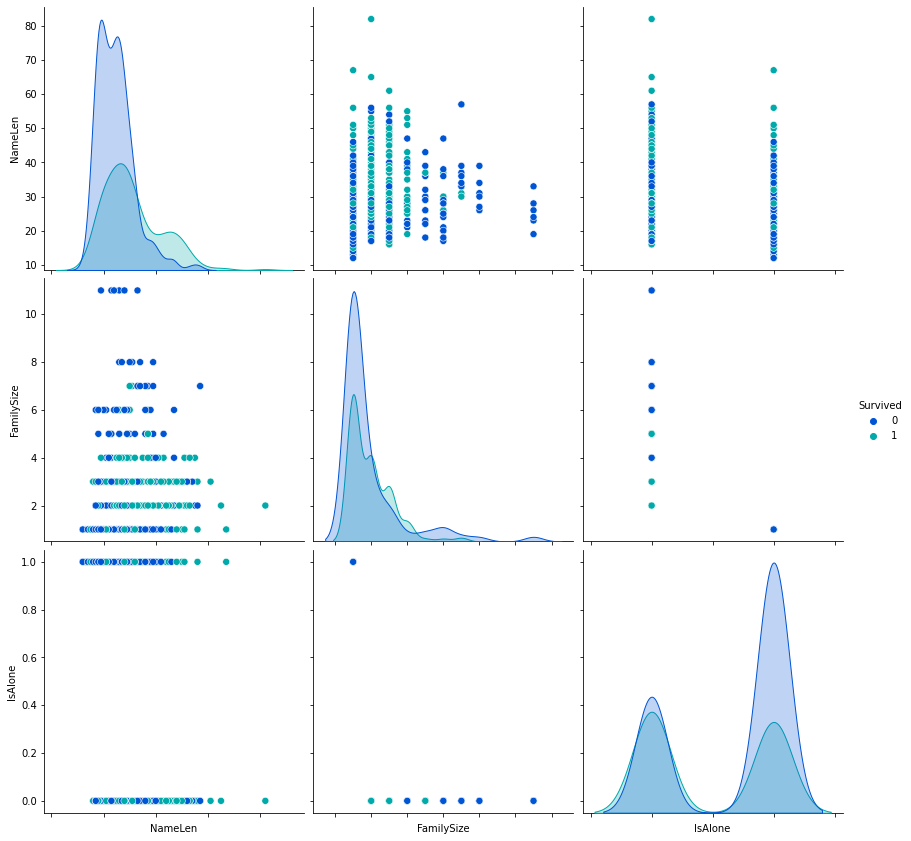

In [ ]:
g = sns.pairplot(Data[[u'Survived', u'NameLen', u'FamilySize', u'IsAlone']], \
                 hue='Survived', palette = 'winter', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

**Задание 12.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

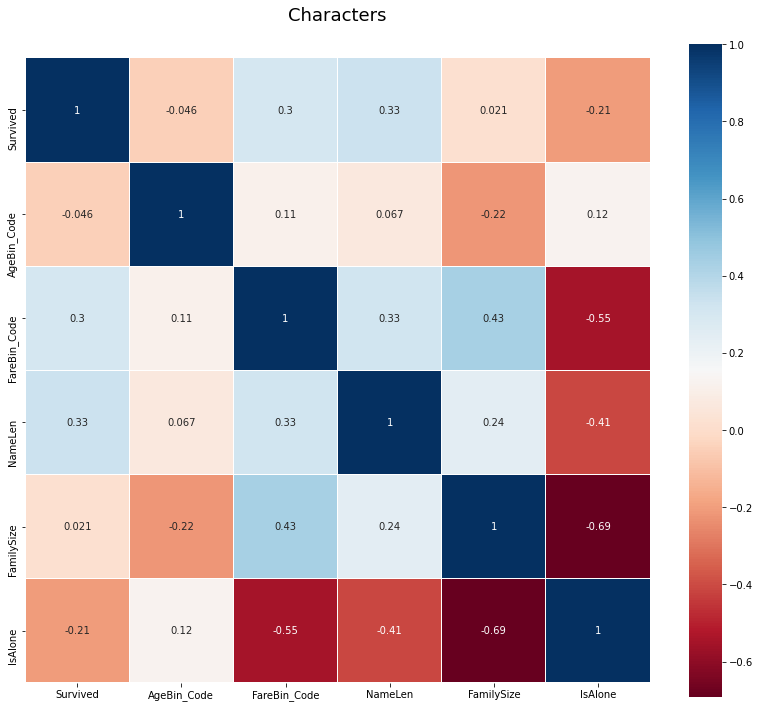

In [ ]:
columns = ['Survived', 'AgeBin_Code', 'FareBin_Code', 'NameLen', 'FamilySize', 'IsAlone']
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Characters', y=1.05, size=18)
sns.heatmap(Data[columns].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 13*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью. Визуализируйте влияние новых признаков на целевую переменную.

In [ ]:
Data['IsFareHigherThanMean'] = Data['Fare'].apply(lambda x: 1 if x > Data['Fare'].mean() else 0)
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,prediction,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone,IsFareHigherThanMean
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]",1,"(-0.001, 7.0]",0,23,2,0,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]",2,"(31.0, 512.0]",3,51,2,0,1
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"(16.0, 32.0]",1,"(-0.001, 7.0]",0,22,1,1,0
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,1,"(32.0, 48.0]",2,"(31.0, 512.0]",3,44,2,0,1
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]",2,"(7.0, 14.0]",1,24,1,1,0


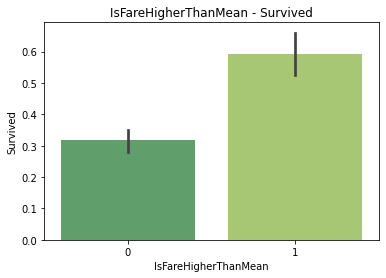

In [ ]:
sns.barplot(x='IsFareHigherThanMean', y='Survived', data=Data, palette='summer')
plt.title('IsFareHigherThanMean - Survived')
plt.show()

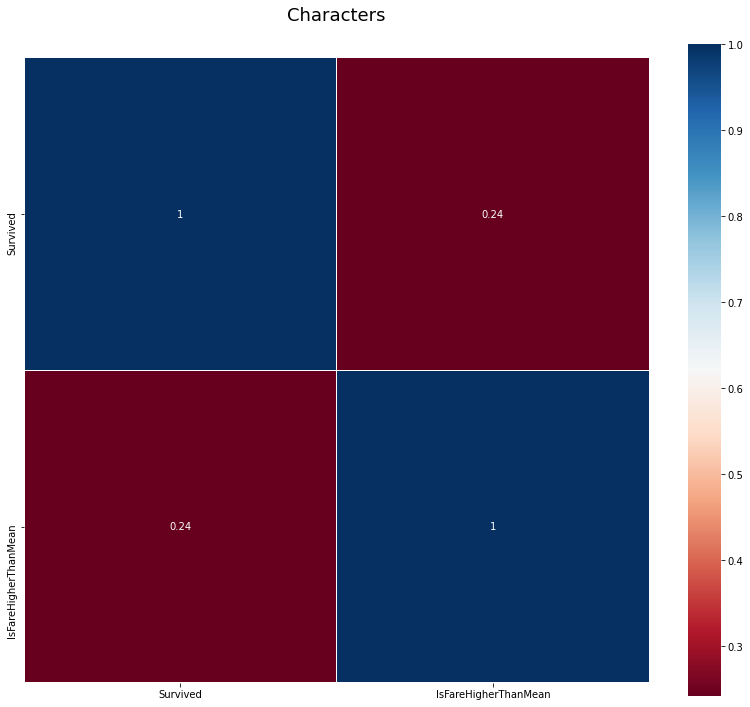

In [ ]:
columns = ['Survived', 'IsFareHigherThanMean']
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Characters', y=1.05, size=18)
sns.heatmap(Data[columns].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Задание 14.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

Да, верно B-)

**Задание 15.** Попробуйте улучшить предсказание нашей модели, используя, кроме признаков Sex и Pclass другие признаки.

In [ ]:
from random import choice

def second_prediction(x):
    if x.Sex == 0:
        if x.IsAlone == 0 and x.Pclass == 3:
          return 0
        return 1
    else:
      if x.AgeBin_Code == 0 and x.Pclass > 1:
        return 0
      if x.AgeBin_Code == 0 and x.Pclass == 1:
        return 1
    return 0
    

In [ ]:
Data['second_prediction'] = Data.apply(lambda x: second_prediction(x), axis=1)
Data[['Survived','second_prediction']]

,Survived,second_prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,0


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Data['Survived'], Data['second_prediction'])

0.8054298642533937